In [1]:
import pickle
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import sklearn
import pandas as pd
import pylab
from datetime import datetime
from datetime import timedelta
from dateutil import parser
from numpy import mean
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import validation_curve
from sklearn.linear_model import Ridge
from sklearn import metrics
import math

In [2]:
# load complete dataframe from data directory
with open('/Users/loraanngerson/Metis/github/webscrape-movie-data/oscar_years_merged_df.pkl', 'r') as picklefile:
    df = pickle.load(picklefile)

In [164]:
# Split data into training and test set
split = int(round(len(df)/2))
print split
indices = np.random.permutation(df.shape[0]) # shuffle indices
training_idx, test_idx = indices[:split], indices[split:] 
df_tr = df.loc[training_idx] # partition data for training
df_ts = df.loc[test_idx] # partition data for testing

308


In [888]:
#### Run cross-validation with various testing/training sets

l = []
l_tr = []
mult = [.1,.2,.3,.4,.5,.6,.7,.8,.9]

for i in mult:
    
    split = i*617.0

    indices = np.random.permutation(df.shape[0]) # shuffle indices
    training_idx, test_idx = indices[:split], indices[split:] 
    df_tr = df.loc[training_idx] # partition data for training
    df_ts = df.loc[test_idx] # partition data for testing

        # Create matrices to model training set
    y_tr, X_tr = dmatrices('Num_Osc ~  Age_start + Years_acting + Gender + \
                           Num_months_rec_pd_15_20 + Num_months_rec_pd_20_25',df_tr)
        # Create matrices to fit on test set
    y_ts, X_ts = dmatrices('Num_Osc ~  Age_start + Years_acting + Gender + \
                           Num_months_rec_pd_15_20 + Num_months_rec_pd_20_25',df_ts)

    #+ Num_months_rec_pd_15_20 + Num_months_rec_pd_20_25
        # Fit a line
    fit = sm.OLS(y_tr, X_tr).fit()

        # Predict values
    y_ts_model = fit.predict(X_ts)

        # Computer mean squared error
    print "Mean squared error on test set for split "+str(split)
    print('sk',sklearn.metrics.mean_squared_error(y_ts, y_ts_model))

    clf = linear_model.LinearRegression()
    clf.fit(X_tr,y_tr)    
    l.append([split,abs(cross_validation.cross_val_score(clf,X_ts,y_ts,cv=5).mean())])
    l_tr.append([split,abs(cross_validation.cross_val_score(clf,X_tr,y_tr,cv=9).mean())])

Mean squared error on test set for split 61.7
('sk', 2.5500870632985944)
Mean squared error on test set for split 123.4
('sk', 2.7360920579752785)
Mean squared error on test set for split 185.1
('sk', 2.7361170964578729)
Mean squared error on test set for split 246.8
('sk', 3.1153135495083082)
Mean squared error on test set for split 308.5
('sk', 2.5320760181068152)
Mean squared error on test set for split 370.2
('sk', 2.4827013014310833)
Mean squared error on test set for split 431.9
('sk', 1.7420089836556256)
Mean squared error on test set for split 493.6
('sk', 1.7966692879918102)
Mean squared error on test set for split 555.3
('sk', 1.0620277957871023)
[[61.7, 0.15777392811900953], [123.4, 0.17148681594033727], [185.1, 0.20434021099995628], [246.8, 0.25488516457700239], [308.5, 0.12621150171603085], [370.2, 0.12529097965389938], [431.9, 0.032579660777194409], [493.6, 0.096541026230952648], [555.3000000000001, 0.16419147127997372]]


In [884]:
#### Create dataframes from cross-validation scores
d = pd.DataFrame(l)
d_tr = pd.DataFrame(l_tr)

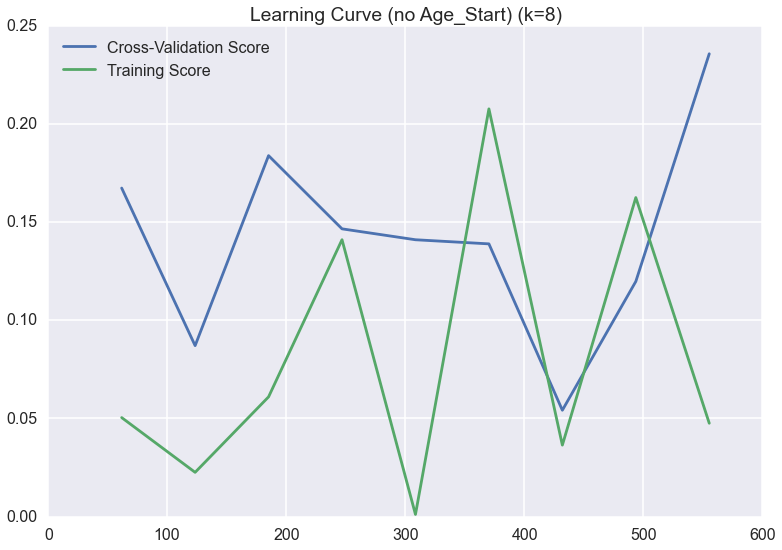

In [886]:
#### Plot learning curve (of cross-validation scores)
sns.set_style("darkgrid")
sns.set_context(context="poster")
plt.plot(d[0],d[1],label='Cross-Validation Score')
plt.plot(d_tr[0],d_tr[1],label='Training Score')
plt.legend(loc='best')
plt.title("Learning Curve (no Age_Start) (k=8)")
#pylab.savefig('Learning_cur_4_ag.png', bbox_inches='tight')

In [601]:
y, X = dmatrices('Num_Osc ~  Years_acting + I(Years_acting**2) + Gender + \
                 Num_months_rec_pd_15_20 + Num_months_rec_pd_20_25',df_tr)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print "classification accuracy:", sklearn.metrics.mean_squared_error(y_test, y_pred)

classification accuracy: 1.67525455415


In [602]:
train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha", np.logspace(-7, 3, 3))

In [603]:
print("train,",train_scores)
print("valid",valid_scores)

('train,', array([[ 0.33648084,  0.33606896,  0.34083976],
       [ 0.33648084,  0.33606896,  0.34083976],
       [ 0.31753947,  0.33111555,  0.32765843]]))
('valid', array([[ 0.29120468,  0.22023438,  0.26042795],
       [ 0.29120718,  0.22023133,  0.26043202],
       [ 0.29060396,  0.21162122,  0.26387623]]))


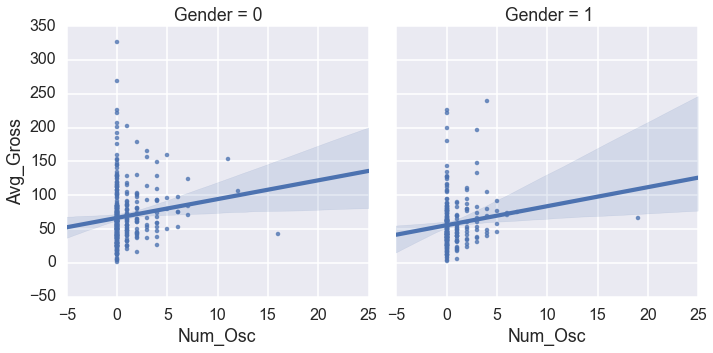

In [396]:
#### Plot with seaborn
sns.set_style("darkgrid")
sns.set_context(context="poster")
sns.color_palette("muted")
sns.lmplot(x="Num_Osc", y="Avg_Gross", col = "Gender", data=df)
pylab.savefig('Num_osc_Avg_gross.png', bbox_inches='tight')
#plt.suptitle("Relationship between Number of Oscar Nominations and Average Gross of Films")

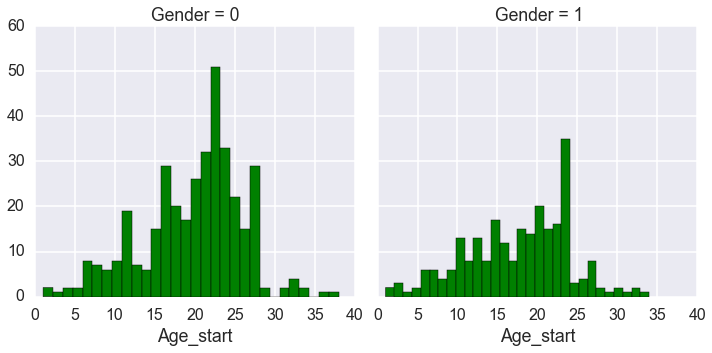

In [540]:
#### Plot histograms by gender
sns.set_style("darkgrid")
sns.set_context(context="poster")
g = sns.FacetGrid(df, col="Gender",size=5)
g = (g.map(plt.hist, "Age_start",color="g",bins=30))
pylab.savefig('Age_St_by_Gender.png', bbox_inches='tight')

In [397]:
df_gb_osc = df.groupby('Avg_Gross')

In [398]:
osc_rec_list = []
osc_rec_list.append(list(df_gb_osc.Num_months_rec_pd_0_5.mean()))
osc_rec_list.append(list(df_gb_osc.Num_months_rec_pd_5_10.mean()))
osc_rec_list.append(list(df_gb_osc.Num_months_rec_pd_10_15.mean()))
osc_rec_list.append(list(df_gb_osc.Num_months_rec_pd_15_20.mean()))
osc_rec_list.append(list(df_gb_osc.Num_months_rec_pd_20_25.mean()))

df_2 = pd.DataFrame(df_gb_osc.Num_months_rec_pd_0_5.mean())
n_df.columns = ['Age 0-5','Age 5-10','Age 10-15','Age 15-20','Age 20-25']

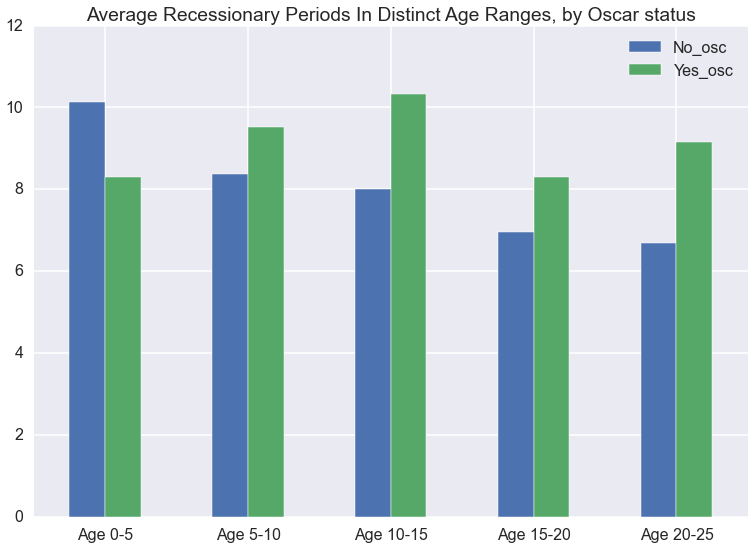

In [337]:
sns.set_style("darkgrid")
sns.set_context(context="poster")
n_df.plot(kind='bar',edgecolor="w")
plt.legend()
plt.xticks(rotation=0)
plt.title("Average Recessionary Periods In Distinct Age Ranges, by Oscar status")
#pylab.savefig('Avg_Rec_pd_Osc.png', bbox_inches='tight')

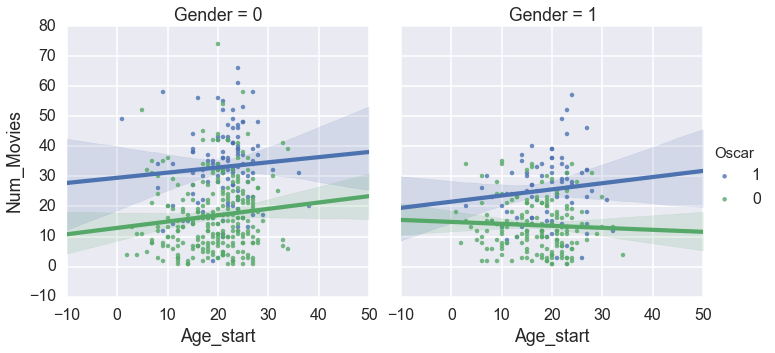

In [656]:
# More years acting are positively correlated with higher average gross of movies for women
sns.lmplot(x="Age_start", y="Num_Movies", hue="Oscar", col = "Gender", data=df)

In [412]:
def compute_error(x,y,fit):
    yfit = fit.predict(x) # evaluates polynomial at value x with coefficients p
    return np.sqrt(np.mean((y - yfit) ** 2))

In [411]:
y, X = dmatrices('Avg_Gross ~ Years_acting + Gender + Num_Movies + Oscar + \
                 Num_months_rec_pd_0_5 + Num_months_rec_pd_5_10 + Num_months_rec_pd_10_15 + \
                 Num_months_rec_pd_15_20 + Num_months_rec_pd_20_25', data=df, return_type='dataframe')

In [427]:
#### Create a column of ages of oscar nominations

df['Ages_Oscar'] = df.apply(lambda row: [int(x)-row['Birthday'].year for x in row['Years_Oscar']] if 
                            row['Years_Oscar'] else 0, axis=1)

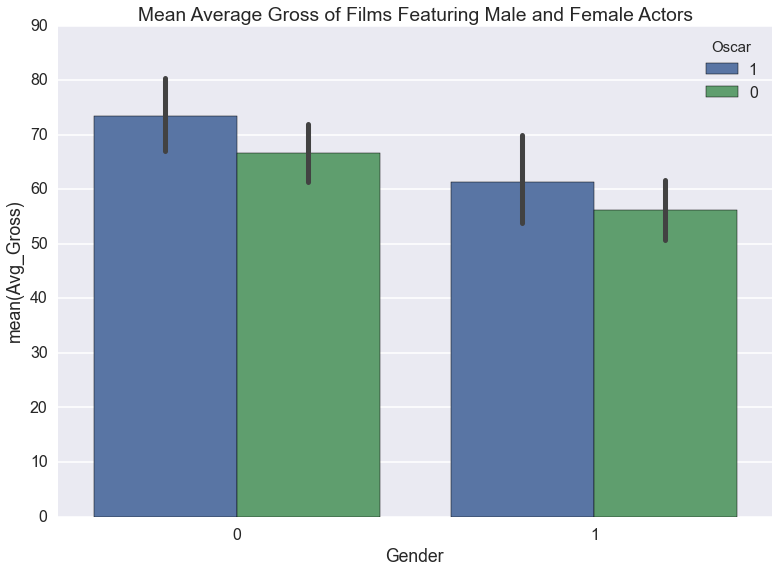

In [478]:
sns.set_style("darkgrid")
sns.set_context(context="poster")
sns.barplot(x="Gender", y="Avg_Gross", hue="Oscar", data=df, estimator=mean)
plt.title("Mean Average Gross of Films Featuring Male and Female Actors")
pylab.savefig('Avg_Gross_Sex_Osc.png', bbox_inches='tight')

In [441]:
gen = new_df_osc.groupby('Gender')

In [526]:
#### Find mean age of oscan nominations

c = []
for ages in new_df_osc.Ages_Oscar:
    [c.append(a) for a in ages]
s = pd.Series(c)
s.mean()

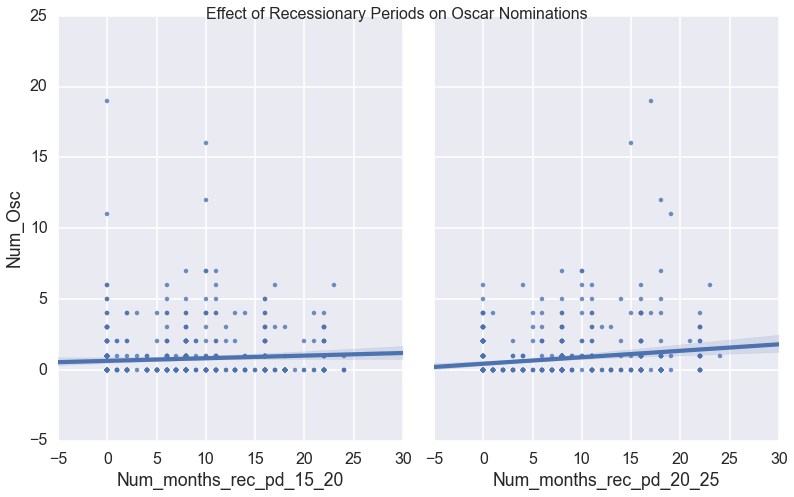

In [648]:
#### Pair plots

sns.set_style("darkgrid")
sns.set_context(context="poster")
sns.pairplot(df, x_vars=["Num_months_rec_pd_15_20", "Num_months_rec_pd_20_25"], y_vars=["Num_Osc"],
             size=7, aspect=.8, kind="reg")
plt.suptitle("Effect of Recessionary Periods on Oscar Nominations",size=16)
pylab.savefig('Rec_pd_osc.png', bbox_inches='tight')

In [510]:
#### Print Top Oscar nominees
df[df.Num_Osc>10].ix[:,['Actor','Years_acting','Num_Osc']].sort('Num_Osc',ascending=False)

,Actor,Years_acting,Num_Osc,Avg_Gross
41,Meryl Streep,44,19,66.548980
278,Woody Allen,65,16,41.881481
28,Jack Nicholson,58,12,105.973529
50,Paul Newman,67,11,154.045000


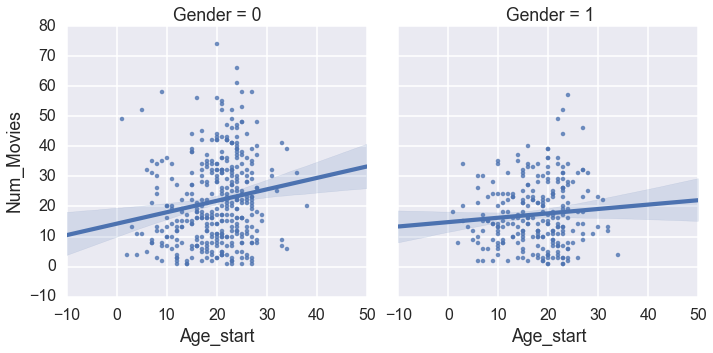

In [660]:
sns.lmplot(x="Age_start", y="Num_Movies", col = "Gender", data=df)

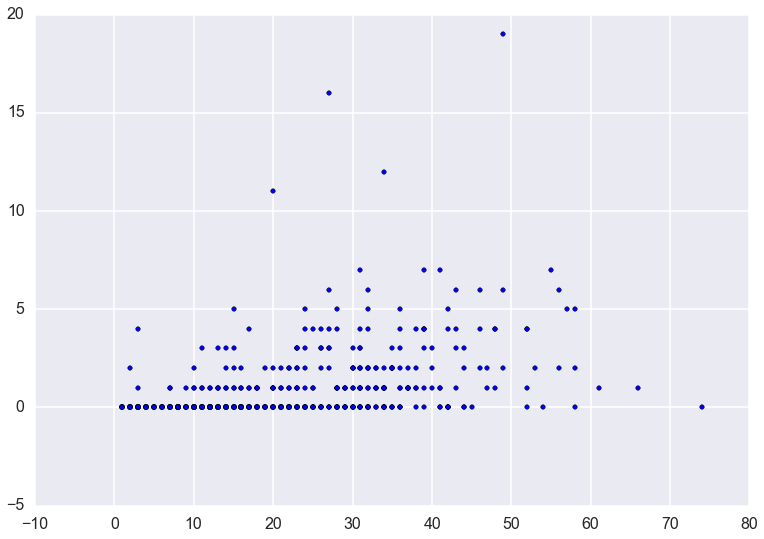

In [857]:
plt.scatter(df.Num_Movies,df.Num_Osc)